### Regression Model Exercises


1. Select a dataset with a continuous target variable.

2. Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

3.  Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

In [2]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

import utilities

import pydataset
from pydataset import data

### Acquire Data

In [3]:
df = data("swiss")
df.head()


,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


### Split and Scale Data

In [5]:
#Split data into train, validate and test

X_train, y_train, X_validate, y_validate, X_test, y_test = utilities.train_validate_test_split(df, 'Fertility')

In [6]:
# Scale numeric_columns

numeric_cols = ['Infant.Mortality', 'Agriculture', 'Examination', 'Education', 'Catholic']
target = ['Fertility']

X_train_scaled, X_validate_scaled, X_test_scaled = utilities.min_max_scale(X_train, X_validate, X_test, numeric_cols)

In [7]:
X_train_scaled.head()

,Infant.Mortality,Agriculture,Examination,Education,Catholic
Rolle,0.122449,0.647561,0.40625,0.290323,0.054508
Lavaux,0.500000,0.796341,0.50000,0.258065,0.004508
Nyone,0.163265,0.526829,0.59375,0.354839,0.130533
Conthey,0.000000,0.953659,0.00000,0.032258,0.997029
Yverdon,0.755102,0.509756,0.37500,0.225806,0.037910


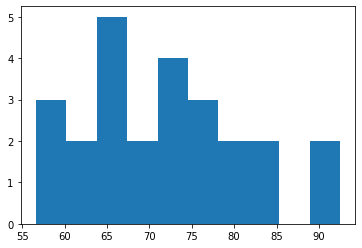

In [8]:
# plot histogram to see distribution of target variable
plt.hist(y_train)
plt.show()

In [9]:
#wrangling data:
#the data has been: acquired, cleaned, split, scaled

### Establish Baseline  (check mean and median)

In [26]:
# Create dataframes of y_train and y_validate , so we can append new columns with predicted values
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# Predict mean
y_pred_mean = y_train['Fertility'].mean()
y_train['y_pred_mean'] = y_pred_mean
y_validate['y_pred_mean']= y_pred_mean

In [27]:
# Predict median
y_pred_median = y_train['Fertility'].median()
y_train['y_pred_median'] = y_pred_median
y_validate['y_pred_median']= y_pred_median

In [28]:
y_train.head()

,Fertility,y_pred_mean,y_pred_median,Fertility_pred_lm
Rolle,60.5,71.536,71.7,60.269929
Lavaux,65.1,71.536,71.7,62.787338
Nyone,56.6,71.536,71.7,58.254874
Conthey,75.5,71.536,71.7,73.350724
Yverdon,65.4,71.536,71.7,75.224245


In [29]:
# Find RMSE of IM_pred_mean
rmse_train = mean_squared_error(y_train.Fertility, y_train.y_pred_mean)**1/2
rmse_validate = mean_squared_error(y_validate.Fertility, y_validate.y_pred_mean)**1/2

print("RMSE using Mean Baseline\nTrain/In-Sample:  ", round(rmse_train, 2),
     "\nValidate/Out-of-Sample:  ", round(rmse_validate, 2,))

# Find RMSE of IM_pred_median
rmse_train = mean_squared_error(y_train.Fertility, y_train.y_pred_median)**1/2
rmse_validate = mean_squared_error(y_validate.Fertility, y_validate.y_pred_median)**1/2

print("RMSE using Median Baseline\nTrain/In-Sample:  ", round(rmse_train, 2),
     "\nValidate/Out-of-Sample:  ", round(rmse_validate, 2))


RMSE using Mean Baseline
Train/In-Sample:   47.76 
Validate/Out-of-Sample:   109.24
RMSE using Median Baseline
Train/In-Sample:   47.78 
Validate/Out-of-Sample:   109.89


In [30]:
#Remember we are looking for the lowest possible errors

#In this case, this is mean

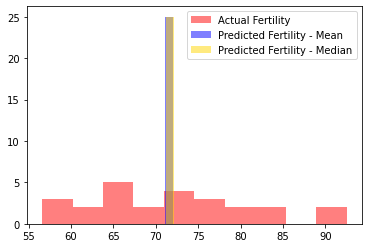

In [31]:
# plot to visualize actual v. predicted

plt.hist(y_train.Fertility, color = 'red', alpha = .5, label = "Actual Fertility")
plt.hist(y_train.y_pred_mean, bins=1, color = 'blue', alpha = .5, rwidth=100, label = "Predicted Fertility - Mean")
plt.hist(y_train.y_pred_median, bins=1, color = 'gold', alpha = .5, rwidth=100, label = "Predicted Fertility - Median")
plt.legend()
plt.show()

### Linear Regression (OLS)

In [21]:
# make the model
lm = LinearRegression(normalize=True)

#fit the model to training data. 
lm.fit(X_train, y_train.Fertility)

#predict train
y_train['Fertility_pred_lm'] = lm.predict(X_train)

In [22]:
# evaluate: RMSE
rmse_train = mean_squared_error(y_train.Fertility, y_train.Fertility_pred_lm)**1/2

In [23]:
#predict validate
y_validate['Fertility_pred_lm'] = lm.predict(X_validate)

In [24]:
# evaluate: RMSE
rmse_validate = mean_squared_error(y_validate.Fertility, y_validate.Fertility_pred_lm)**1/2

In [25]:
print("RMSE for OLS using LinearRegression\nTraining In-Sample:  ", rmse_train, "\nValidation/Out-of-Sample:  ", rmse_validate)

RMSE for OLS using LinearRegression
Training In-Sample:   10.447217249973203 
Validation/Out-of-Sample:   73.6016683323816


### LassoLars

In [35]:
#create the model
lars = LassoLars(alpha = 1.0)

#fit the model to training data
lars.fit(X_train, y_train.Fertility)

#predict train
y_train['Fertility_pred_lars'] = lars.predict(X_train)

In [36]:
#evaluate: rmse
rmse_train = mean_squared_error(y_train.Fertility,y_train.Fertility_pred_lars)**1/2

In [37]:
#predict validate
y_validate['Fertility_pred_lars'] = lars.predict(X_validate)

#evaluate: rmse
rmse_validate = mean_squared_error(y_validate.Fertility,y_validate.Fertility_pred_lars)**1/2

print("RMSE for Lasso + Lars\nTraining\In-Sample:  ", rmse_train, "\nValidation/Out-of-Sample:  ", rmse_validate)


RMSE for Lasso + Lars
Training\In-Sample:   39.61201133380877 
Validation/Out-of-Sample:   106.3445277084357


### TweedieRegressor (GLM - Generalized Linear Model)

In [38]:
#create the model object
glm = TweedieRegressor(power=1, alpha=0)

#fit the model to training data
glm.fit(X_train,y_train.Fertility)

#predict train
y_train['Fertility_pred_glm']=glm.predict(X_train)

#evaluate: rmse
rmse_train = mean_squared_error(y_train.Fertility,y_train.Fertility_pred_glm)**1/2

#predict validate
y_validate['Fertility_pred_glm']=glm.predict(X_validate)

#evaluate: rmse
rmse_validate = mean_squared_error(y_validate.Fertility,y_validate.Fertility_pred_glm)**1/2

print("RMSE for GLM using Tweedie, power = 1 & alpha = 0\nTraining/In-Sample:  ", rmse_train, "\nValidation/Out-of-Sample:  ", rmse_validate)



RMSE for GLM using Tweedie, power = 1 & alpha = 0
Training/In-Sample:   10.036747718677738 
Validation/Out-of-Sample:   74.05882950990832




### Polynomial Regression - Create Polynomial Features, Then Linear Regression


In [40]:
# make the polynomial fetures to get a new set of features
pf = PolynomialFeatures(degree=2)

#fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

#transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)



#### Linear Regression

In [48]:
# make the model
lm2 = LinearRegression(normalize=True)

#fit the model to training data. 
lm2.fit(X_train_degree2, y_train.Fertility)

#predict train
y_train['Fertility_pred_lm2'] = lm2.predict(X_train_degree2)

In [49]:
# evaluate: RMSE
rmse_train = mean_squared_error(y_train.Fertility, y_train.Fertility_pred_lm2)**1/2

In [50]:
#predict validate
y_validate['Fertility_pred_lm2'] = lm2.predict(X_validate_degree2)

In [51]:
# evaluate: RMSE
rmse_validate = mean_squared_error(y_validate.Fertility, y_validate.Fertility_pred_lm2)**1/2

In [52]:
print("RMSE for Polynomial Model, degrees=2\nTraining In-Sample:  ", rmse_train, "\nValidation/Out-of-Sample:  ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training In-Sample:   3.3524813185909874 
Validation/Out-of-Sample:   355.310268825674


### Evaluate

#### Plotting Actual v. Predicted Values

In [53]:
y_validate.head()


,Fertility,y_pred_mean,y_pred_median,Fertility_pred_lm,Fertility_pred_lars,Fertility_pred_glm,Fertility_pred_lm2
Moudon,65.0,71.536,71.7,75.551909,70.270910,75.176028,70.440827
Echallens,68.3,71.536,71.7,68.967459,70.911508,68.365149,56.529804
Moutier,85.8,71.536,71.7,78.065280,71.223018,77.817211,52.966604
Morges,65.5,71.536,71.7,58.758237,70.294021,59.420292,56.233434
Sierre,92.2,71.536,71.7,75.725605,73.361275,75.356502,73.448374


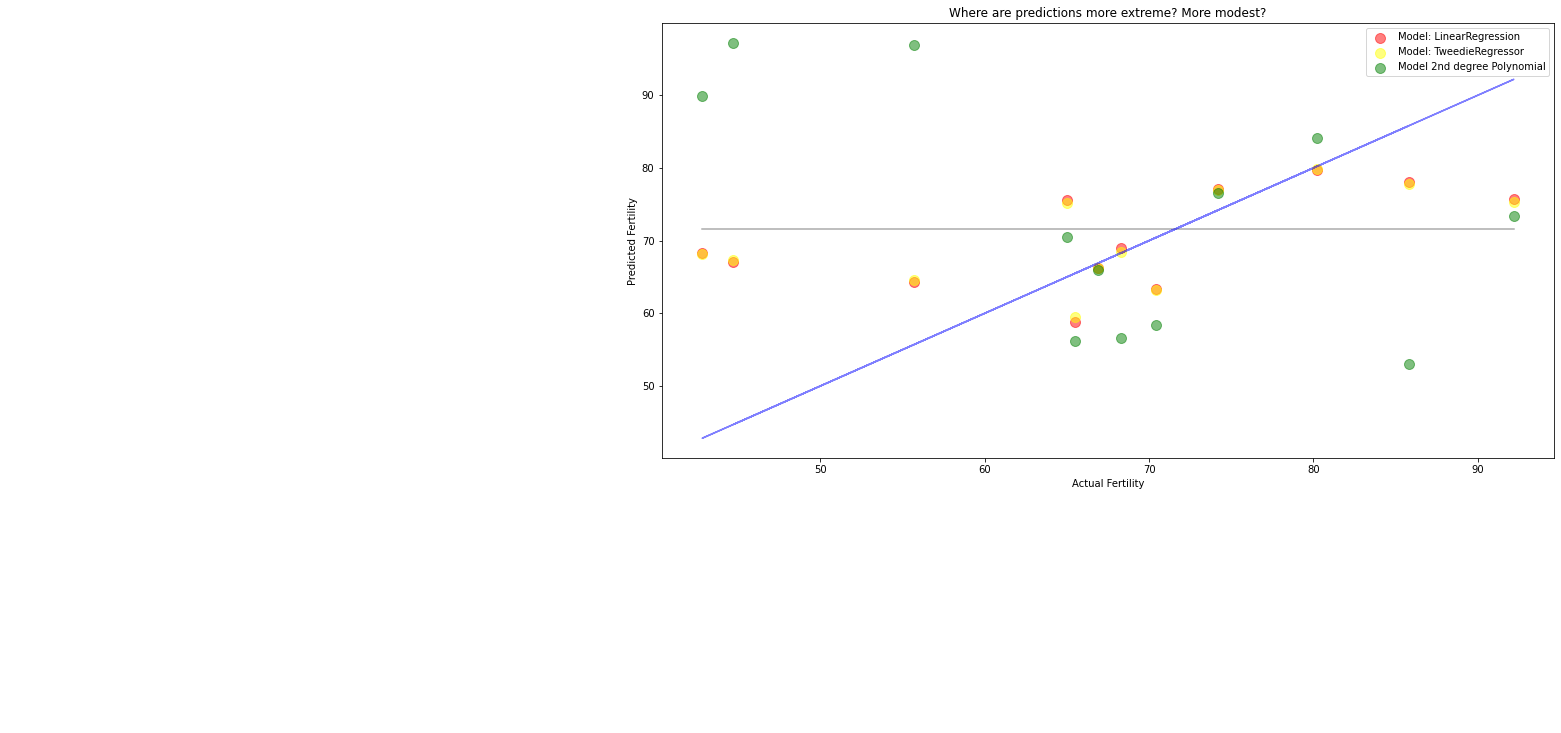

In [54]:
plt.figure(figsize=(16,8))
plt.plot(y_validate.Fertility, y_validate.y_pred_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.Fertility, y_validate.Fertility, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)
plt.scatter(y_validate.Fertility, y_validate.Fertility_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.Fertility, y_validate.Fertility_pred_glm, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.Fertility, y_validate.Fertility_pred_lm2, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Fertility")
plt.ylabel("Predicted Fertility")
plt.title("Where are predictions more extreme? More modest?")
plt.show()

In [55]:
y_validate.head()

,Fertility,y_pred_mean,y_pred_median,Fertility_pred_lm,Fertility_pred_lars,Fertility_pred_glm,Fertility_pred_lm2
Moudon,65.0,71.536,71.7,75.551909,70.270910,75.176028,70.440827
Echallens,68.3,71.536,71.7,68.967459,70.911508,68.365149,56.529804
Moutier,85.8,71.536,71.7,78.065280,71.223018,77.817211,52.966604
Morges,65.5,71.536,71.7,58.758237,70.294021,59.420292,56.233434
Sierre,92.2,71.536,71.7,75.725605,73.361275,75.356502,73.448374


### Residual Plots: Plotting the Errors in Predications 

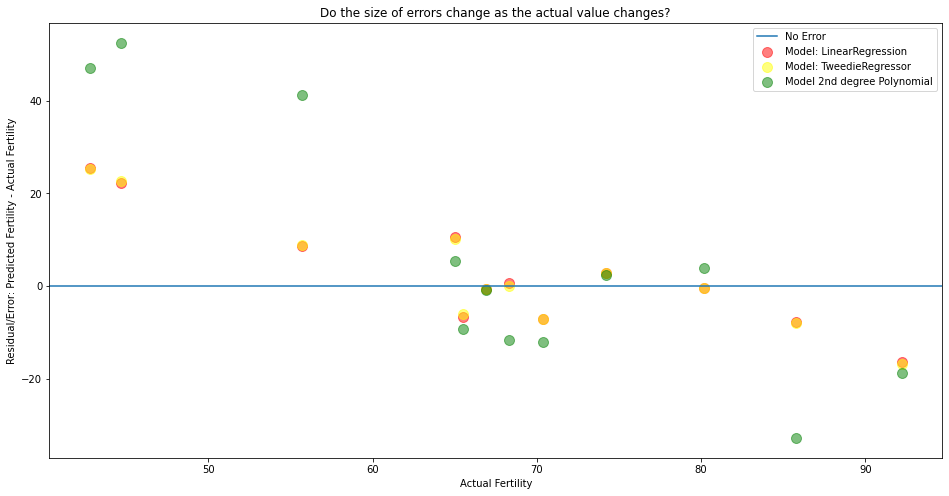

In [56]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.Fertility, y_validate.Fertility_pred_lm - y_validate.Fertility , 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.Fertility, y_validate.Fertility_pred_glm - y_validate.Fertility, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.Fertility, y_validate.Fertility_pred_lm2 - y_validate.Fertility, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Fertility")
plt.ylabel("Residual/Error: Predicted Fertility - Actual Fertility")
plt.title("Do the size of errors change as the actual value changes?")
plt.show()

### Histograms

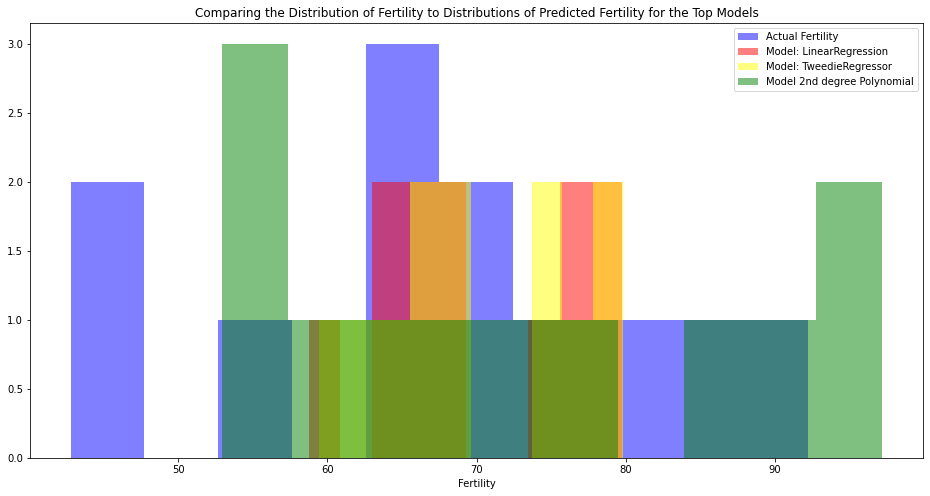

In [57]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.Fertility, color='blue', alpha=.5, label="Actual Fertility")
plt.hist(y_validate.Fertility_pred_lm, color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate.Fertility_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.Fertility_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("Fertility")
plt.title("Comparing the Distribution of Fertility to Distributions of Predicted Fertility for the Top Models")
plt.legend()
plt.show()

In [58]:
#data('swiss',show_doc=True)

### Model Selection & Out-of-Sample Evaluation

#### Model selected: lm (using Linear Regression)

In [59]:
y_test = pd.DataFrame(y_test)

# predict on test
y_test['Fertility_pred_lm'] = lm.predict(X_test)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.Fertility, y_test.Fertility_pred_lm)**1/2

print("RMSE for OLS Model using LinearRegression\nOut-of-Sample Performance: ", rmse_test)

RMSE for OLS Model using LinearRegression
Out-of-Sample Performance:  57.0303564031293
